Below we import the necessary packages

In [60]:
# General Packages
import numpy as np
from IPython.display import Image # allows to display saved images inline
import scipy.integrate as spint
import scipy.special as spsp
import scipy.stats as spstat
import matplotlib.pyplot as plt
import time as time
# Random package
import random as random

This notebook will solve the Boltzmann equations and generate the data we will learn from.
The Boltzmann equations for a simple particle species can be compactly written as
$$ z\frac{\partial Y_L}{\partial z}=\epsilon D\left(\frac{Y_1}{Y_1^{eq}}-1\right)-Y_LW$$
and 
$$ z\frac{\partial Y_1}{\partial z}=- D\left(\frac{Y_1}{Y_1^{eq}}-1\right)$$.

Where $Y_L$ is the lepton asymmetry yield which is a convenient measure of the asymmetry. $\epsilon$ is the CP-asymmetry, and $D,W$ are functions that quantify the strength of the decay and inverse decay respectively. Finally $Y^{eq}_1$ is simply the equilibrium yield for the species '1' that generates the asymmetry.

In the above equations, we ignored the scattering processes which are only subleading compared to the decays and inverse decays.

The functions $Y^{eq}_1$, $D$, and $W$ are defined as follows

$$\begin{align}&Y_1^{eq}(z)=\frac{3}{8}z^2K_2(z),\\ &D(z)=Kz^2Y_1^{eq}\frac{K_1(z)}{K_2(z)},\\&W(z)=D(z)/Y^{eq}_L\\&Y^{eq}_L=\frac{3}{4}\end{align}$$

The functions are defined below,

In [27]:
def Yeq(z):
 fun=(3.0/8)*z**2*spsp.kn(2,z);
 return(fun)
#end

def D(z,K):
 fun=K*z**2*(spsp.kn(1,z)/spsp.kn(2,z))*Yeq(z);
 return(fun)
#end

In [28]:
print D(1,1)

0.22571521132396297


Below we define the constants and some intitial conditions for the differential equations.

In [29]:
zmin=0.01;
zmax=100;
dz=0.0001;

z=np.arange(zmin,zmax,dz)
nz=len(z);

Yleq=3.0*4**(-1);
K=10;
eps=1.0e-6;
Y10=0.0;
Yl0=1.0e-20;
state0=[Y10,Yl0];

In [66]:
vec = []
for i in xrange(nz):
    vec.append(Yeq(z[i]))

plt.figure()
plt.plot(z,vec)
plt.show()

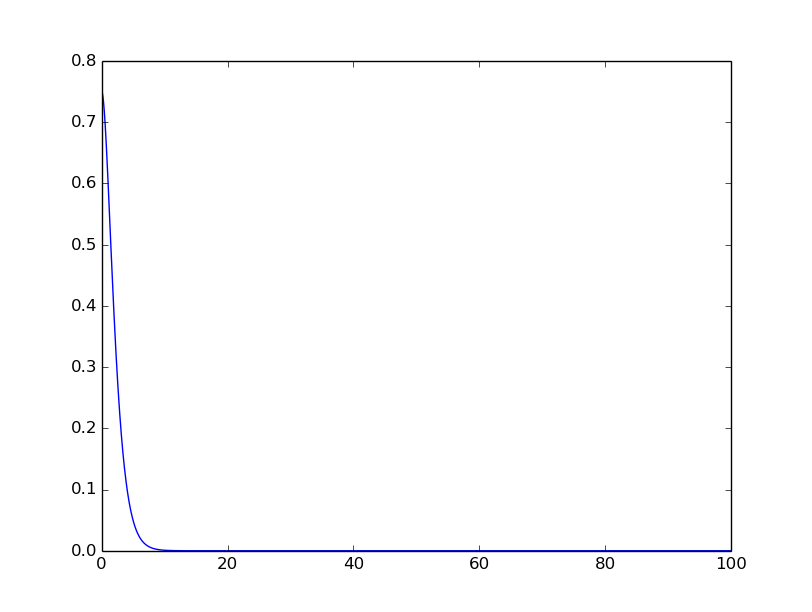

In [67]:
Image(filename='equilibrium.png')

In [ ]:
def St_Boltzmann(state,z):
 y1=state[0];
 yl=state[1];
 
 Y1d=D1(z,K)*(1-y1/Y1eq(z))/z; 
 Yld=(eps*(y1/Y1eq(z)-1)-yl/(2*Yleq))*D1(z,K)/z;

 return(Y1d,Yld)
#end

# ODE solver parameters
abserr = 1.0e-13
relerr = 1.0e-13
state=odeint(St_Boltzmann,state0,z, atol=abserr, rtol=relerr,hmax=0.0,hmin=0.0);

Y1,Yl=state.T


#figure()
#plot=loglog(z,Y1,'b-',z,1.0e6*abs(Yl),'m',z,Y1eq(z),'k--')
#xlim(zmin,zmax)
#ylim(10**(-5),10)
#title('Standard Boltzmann equations, $K_1=$ %d' % int(K))
#show()